In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense

from xgboost import XGBRFRegressor 
import xgboost

In [3]:
#!wget https://raw.githubusercontent.com/JasonMorris1/CSE151_Tesla_Stock_Prediction/main/tsla_2014_2023.csv
df = pd.read_csv('tsla_2014_2023.csv')
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.drop(columns=['open', 'high', 'low']) # not sure why we do this
df.head()



,date,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,year
0,2014-01-02,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667,2014
1,2014-01-03,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000,2014
2,2014-01-06,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,2014
3,2014-01-07,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,2014
4,2014-01-08,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333,2014


In [4]:
df_train=df[(df.year<2022)]
df_test=df[(df.year >=2022)]

X_train=df_train.drop(['date','year','next_day_close'],axis=1)
X_test=df_test.drop(['date','year','next_day_close'],axis=1)
##
y_train=df_train['next_day_close']
y_test=df_test['next_day_close']

X_train_date = df_train['date']
X_test_date = df_test['date']

In [5]:
xgbrf_regressor = XGBRFRegressor(n_estimators=100, max_depth=100)


In [6]:
xgbrf_regressor.fit(X_train, y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=100, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [8]:
from sklearn.metrics import mean_squared_error

y_pred = xgbrf_regressor.predict(X_test)
mean_squared_error(y_test, y_pred)


236.96422395141673

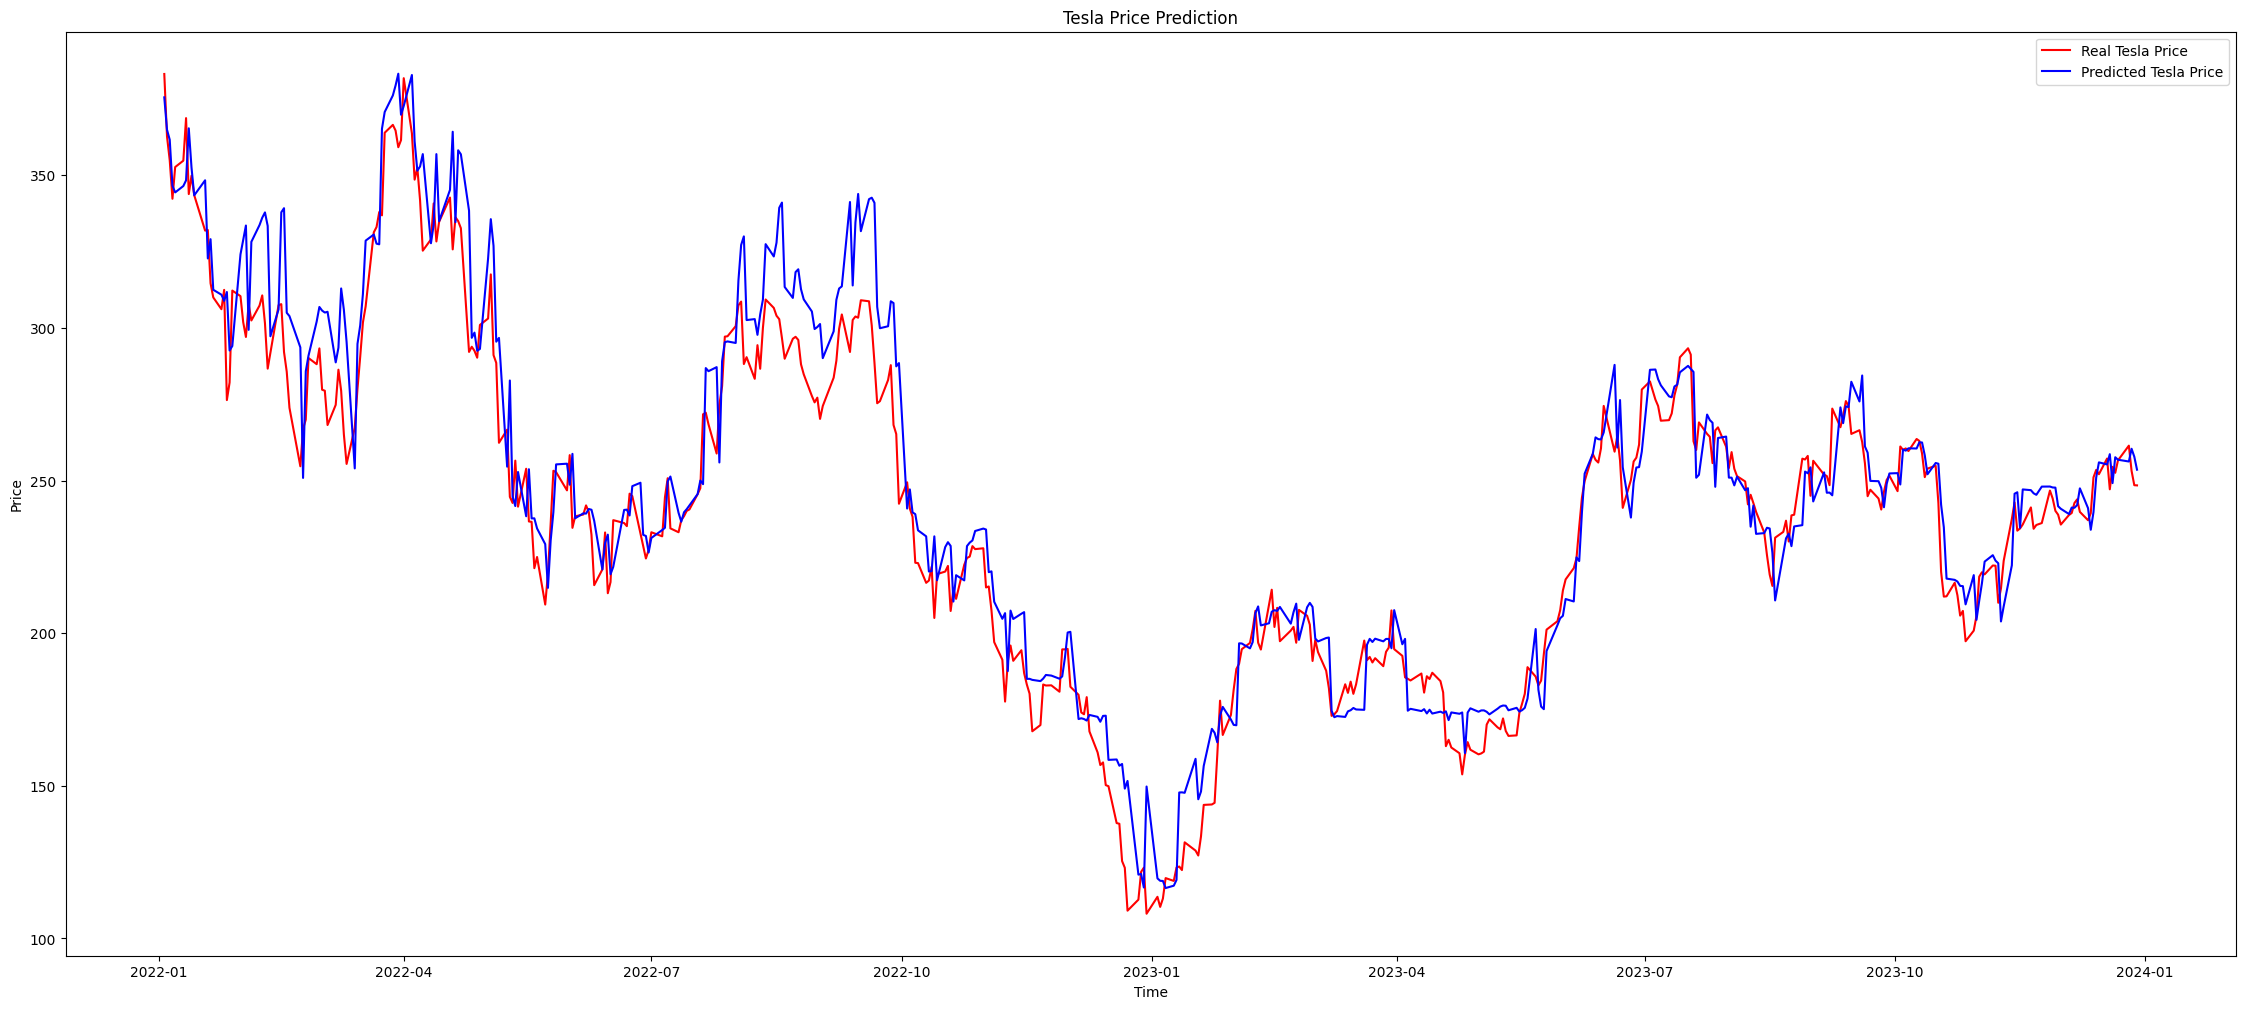

In [11]:
plt.figure(figsize=(28,12))
plt.plot(X_test_date, y_test, color = 'red', label = 'Real Tesla Price')
plt.plot(X_test_date, y_pred, color = 'blue', label = 'Predicted Tesla Price')
plt.title('Tesla Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()